In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

%matplotlib notebook

import keras

from keras.layers import Convolution2D, Flatten, Dense, MaxPool2D, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dirs = os.listdir('/Users/ishpreet/Desktop/Major Project/Datasets/')
path = '/Users/ishpreet/Desktop/Major Project/Datasets/'
flag=0
labels = []
lab=[]
langName = []


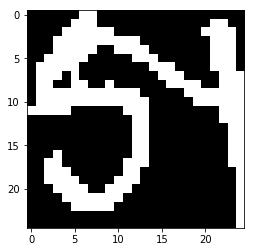

In [3]:
bimgch = cv2.imread('/Users/ishpreet/Desktop/Major Project/Datasets/Bengali/185/bcc000210.bmp',0)
rndm , bimgch = cv2.threshold(bimgch,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
bimgch = cv2.resize(bimgch, dsize=(25, 25), interpolation=cv2.INTER_CUBIC)

rndm , bimgch = cv2.threshold(bimgch,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(bimgch,cmap='gray')

In [3]:
c = 0
x = 0
lanc = 0
imgarr = []

for i in dirs:
    
    
    
    if(i[0]=='.'):
        continue
   

    print(i)
    st = path+i
    flag = 0
    
    
    if(i=='English' or i=='Hindi'):
        flag = 1

        
    if(i=='Tamil'):
        continue
        
        
    
    
    
    
    for j in os.listdir(st):
        
        
        if(j[0]=='.'):
            continue
            
        st2 = st+'/'+j
        x = x+1
        
        count_img = 0
        
        for k in os.listdir(st2):
            
            if(k[0]=='.'):
                continue
            
            img = cv2.imread(st2+'/'+k, 0)
            
            count_img+=1
            
            if((i=='English' and count_img>180) or (i=='Hindi' and count_img>240)):
                break
            
            #print (img.shape)
            
            
            
            
            if(i=='Hindi'):
                random , img = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
                
            else:          
                random , img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            
            
            img = img.astype('uint8')
            kernel = np.ones((2,2),np.uint8)
            
            if(i=='Tamil'):
                img = cv2.dilate(img,kernel,iterations = 1)
            
            finimg = img
            
            if(flag==1):
            
                image, contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

                maxa = 0
                maxx = 0
                maxy = 0
                maxw,maxh=0,0

                for contour in contours:
                # get rectangle bounding contour
                    [x, y, w, h] = cv2.boundingRect(contour)

                    if(w*h>maxa):

                        maxa,maxx,maxy,maxw,maxh = w*h,x,y,w,h
                        
                    

                
                finimg = img[maxy:maxy+maxh,maxx:maxx+maxw]
                
                
#             elif()
                
#                 kernel = np.ones((2,2),np.uint8)
#                 finimg = cv2.dilate(finimg,kernel,iterations = 1)
                

            finimg = cv2.resize(finimg, dsize=(25, 25), interpolation=cv2.INTER_CUBIC)

            random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

            c = c+1

            
            labels.append(i+j)
            lab.append(x)
            imgarr.append(finimg)
            langName.append(lanc)
            
    lanc = lanc+1

Hindi
English
Bengali


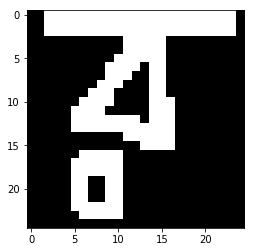

In [5]:
plt.imshow(imgarr[31006],cmap = 'gray')

In [4]:
labs = np_utils.to_categorical(langName)
labs.shape

(34200, 3)

In [5]:
np.unique(langName,return_counts=True)

(array([0, 1, 2]), array([11040, 11160, 12000]))

In [6]:
imgarr = np.array(imgarr).reshape((len(imgarr), 25, 25, 1))

In [7]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(25, 25, 1)))
model.add(Activation('relu'))

model.add(Convolution2D(16, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(8, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(labs.shape[1]))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model = Sequential()

# model.add(Convolution2D(64, (3, 3), input_shape=(50, 50, 1)))
# model.add(Activation('relu'))

# model.add(Convolution2D(32, (3, 3)))
# model.add(Activation('relu'))

# model.add(MaxPool2D(pool_size=(2, 2)))


# model.add(Convolution2D(16, (3, 3)))
# model.add(Activation('relu'))

# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(8, (3, 3)))
# model.add(Activation('relu'))

# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dropout(0.4))

# model.add(Dense(labs.shape[1]))
# model.add(Activation('softmax'))

# model.summary()
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 23, 23, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 16)        4624      
_________________________________________________________________
activation_2 (Activation)    (None, 21, 21, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 8)           0         
__________

In [34]:
hist = model.fit(imgarr, labs,
                epochs=1,
                shuffle=True,
                batch_size=100,
                validation_split=0.2)

Train on 27360 samples, validate on 6840 samples
Epoch 1/1
27360/27360 [==============================] - 11s 387us/step - loss: 0.4656 - acc: 0.8127 - val_loss: 0.5657 - val_acc: 0.7620


In [35]:
from keras.models import model_from_json
model_json = model.to_json()
with open("hindengbeng76.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("hindengbeng76.h5")
print("Saved model to disk")

#TO USE OLD PARAMETERS
# later...
 
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Saved model to disk


In [8]:
# load json and create model
from keras.models import model_from_json
json_file = open('hindengbeng76.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("hindengbeng76.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model = loaded_model 



Loaded model from disk


(661, 600)


<IPython.core.display.Javascript object>


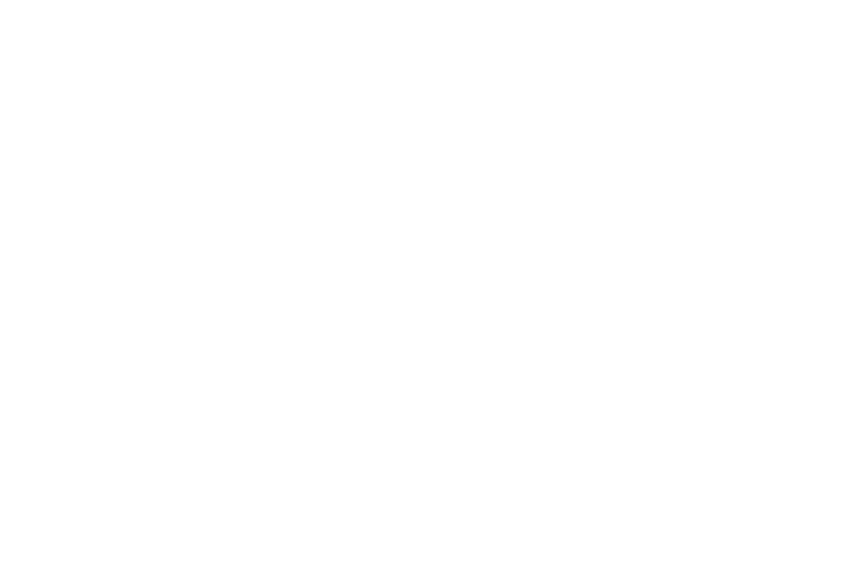

<IPython.core.display.Javascript object>


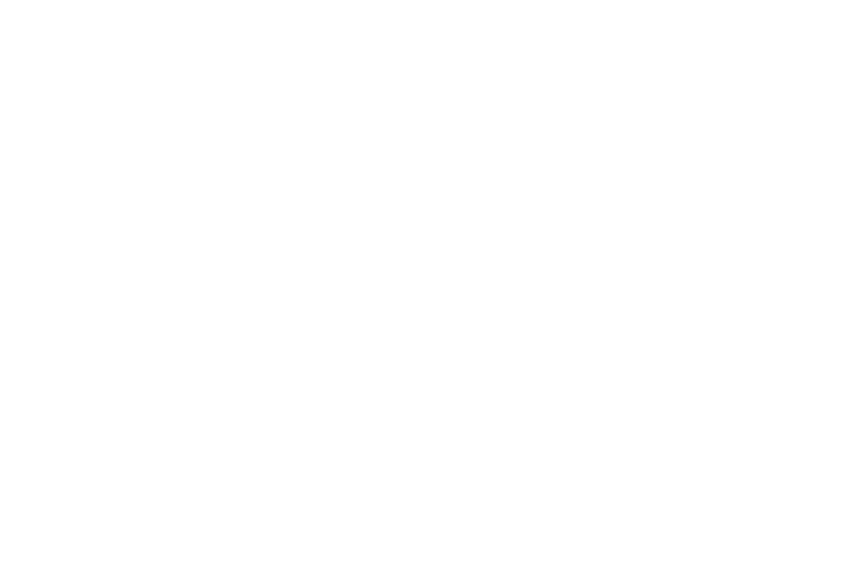

1
check False
{1: 2, 0: 1}


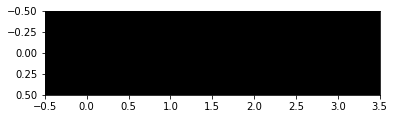

In [22]:
Image=cv2.imread('/Users/ishpreet/Downloads/Text docs/hinditext.jpeg', 0)
rimg , cimg = Image.shape
#Image = cv2.resize(Image, dsize=(500, 500*cimg//rimg), interpolation=cv2.INTER_CUBIC)
#create a CLAHE object (Arguments are optional).
# plt.imshow(img,cmap = 'gray')
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

Image = clahe.apply(Image)
I=Image.copy()

i=Image.copy()
G_Image=Image

print(i.shape)
chars = []

#Otsu Thresholding
blur = cv2.GaussianBlur(G_Image,(1,1),0)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# kernel = np.ones((3,3),np.uint8)
# th = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)


# grab the (x, y) coordinates of all pixel values that
# are greater than zero, then use these coordinates to
# compute a rotated bounding box that contains all
# coordinates
coords = np.column_stack(np.where(th > 0))
angle = cv2.minAreaRect(coords)[-1]
 

# the `cv2.minAreaRect` function returns values in the
# range [-90, 0); as the rectangle rotates clockwise the
# returned angle trends to 0 -- in this special case we
# need to add 90 degrees to the angle
if angle < -45:
    angle = -(90 + angle)

    
else:    
    angle = - angle
    

# rotate the image to deskew it
(h, w) = Image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
th = cv2.warpAffine(th, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

#%matplotlib notebook
#plt.imshow(th,cmap = 'gray')

plt.imshow(th,cmap = 'gray')
image, contours, hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#print('len',len(contours))
#img = cv2.drawContours(Image, contours, -1, (0,255,0), 3)

for contour in contours:
        # get rectangle bounding contour
    [x, y, w, h] = cv2.boundingRect(contour)
        
    chars.append((x,y,w,h))

#         if h>20:
#             continue

    cv2.rectangle(Image, (x, y), (x + w, y + h), (0, 0, 0),1)

        
%matplotlib notebook
plt.imshow(Image)

newchar =[]
newchar = sepwords(th,chars)
print('check' , chars == newchar)
chars = newchar


checkar = []
checkarlab = []
checkcord = []
pred = {}

for n in range(len(chars)):
    
    finimg = i[chars[n][1]:chars[n][1]+chars[n][3], chars[n][0]:chars[n][0]+chars[n][2]]
    
    if(finimg.shape[0]*finimg.shape[1]>rimg*cimg/100000):
        
        #print('ndjicnsi')
        
        checkcord.append(chars[n])
        
        #cv2.rectangle(Image, (chars[n][0], chars[n][1]), (chars[n][0] + chars[n][2], chars[n][1] + chars[n][3]), (0, 0, 0),1)

        finimg = finimg.astype('uint8')
        random, finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


        finimg = cv2.resize(finimg, dsize=(25, 25), interpolation=cv2.INTER_CUBIC)

        random , finimg = cv2.threshold(finimg,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        checkar.append(finimg)

        finimg = np.array(finimg).reshape(( -1,25, 25, 1))

        predval = np.argmax(model.predict(finimg))

        checkarlab.append(predval)
        try:
            pred[predval]=pred[predval]+1

        except:
            pred[predval]=1

            

        
print(pred)

In [13]:
len(chars)

968

In [14]:
len(newchar)

968

0
(78, 648, 7, 7)


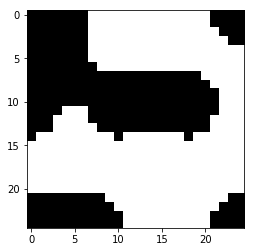

In [18]:
vv = 1



%matplotlib inline
plt.imshow(checkar[vv], cmap='gray')

print(checkarlab[vv])



print(checkcord[vv])

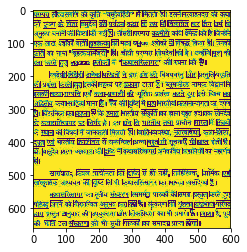

In [48]:
plt.imshow(Image)

<IPython.core.display.Javascript object>


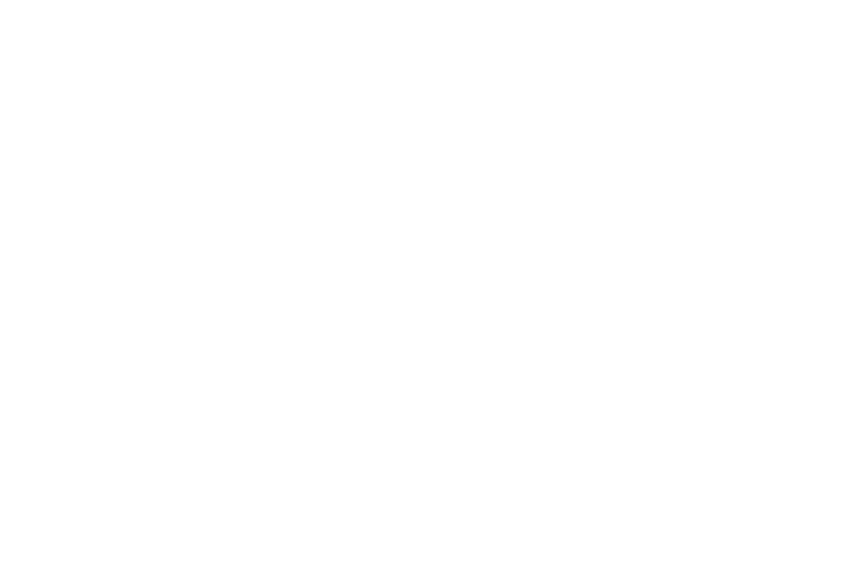

<IPython.core.display.Javascript object>


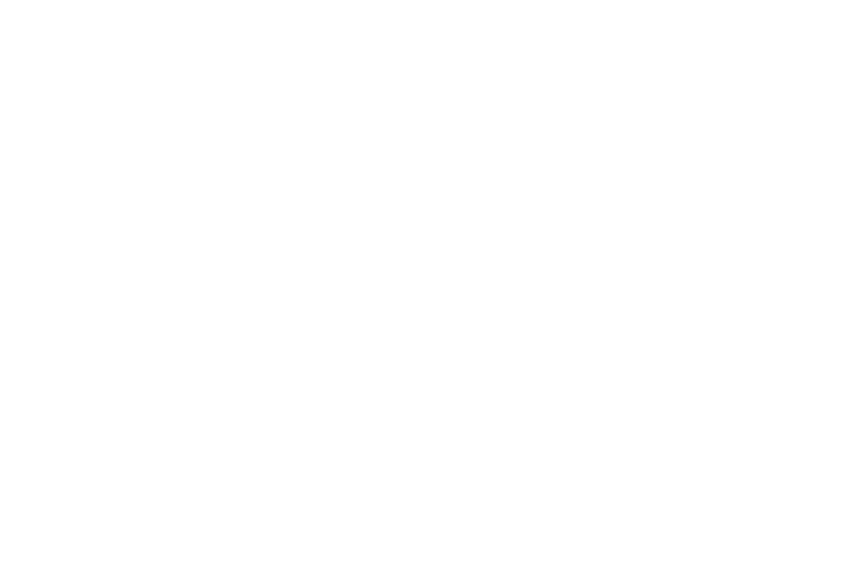

In [49]:
%matplotlib notebook
plt.imshow(Image,cmap = 'gray')

In [14]:
cv2.imshow('Window',Image)
cv2.waitKey(0)

48

In [21]:


def sepwords(img , cord):
    
    coun = 0
    fincord = []
    
    
    for n in range(len(cord)):

        if(cord[n][2]/cord[n][3]<2):

            fincord.append(cord[n])
            continue
            
        coun += 1

        hinimg = img[chars[n][1]:chars[n][1]+chars[n][3], chars[n][0]:chars[n][0]+chars[n][2]]
        
        %matplotlib inline
        plt.imshow(hinimg,cmap = 'gray')
        break
        
        r,c = hinimg.shape
        s = []
        s1=0
        ms = 0
        

        for i in range(r):
            s1=0   
            for j in range(c):

                s1+=hinimg[i][j]

            if s1>=ms:
                ms = s1
                rowOfline = i
                

            s.append(s1)


        rows2del = []

        for i in range(r):

            if s[i]>=0.80*ms:

                for j in  range(c):

                    hinimg[i][j] = 0

        #plt.imshow(hinimg,cmap='gray')


        hini = hinimg.copy()

        char = []

        image1, contours1, hierarchy1 = cv2.findContours(hini,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        #img = cv2.drawContours(Image, contours, -1, (0,255,0), 3)

        for contour in contours1:
                # get rectangle bounding contour
                [x, y, w, h] = cv2.boundingRect(contour)
                
                if(y<rowOfline):
                    continue

                fincord.append((x,y-2,w,h+2))
                
      
    print(coun)
    return fincord


